In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data (years of experience, age, salary)
n_samples = 100
years_of_experience = np.random.randint(1, 30, size=n_samples)
age = np.random.randint(20, 60, size=n_samples)

# Generate salary based on some linear relationship
salary = 5000 * years_of_experience + 2000 * age + np.random.normal(0, 5000, size=n_samples)  # Add some noise

# Create DataFrame
data = pd.DataFrame({
    'Experience_Years': years_of_experience,
    'Age': age,
    'Salary': salary
})

# Show dataset shape and head
print("Dataset Shape:", data.shape)
print(data.head())

Dataset Shape: (100, 3)
   Experience_Years  Age         Salary
0                 7   27   98430.929506
1                20   33  166872.889064
2                29   42  230287.751954
3                15   59  192627.770421
4                11   40  125406.143924


In [22]:
# Initialize weights and biases
input_size = 2  # 2 features (years_of_experience, age)
output_size = 1  # 1 output (salary)

# Randomly initialize weights and biases
W = np.random.randn(input_size, output_size)
b = np.random.randn(output_size)

# Forward propagation
def forward(X):
    return np.dot(X, W) + b

# Mean Absolute Error (MAE) Loss Function
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Mean Squared Error (MSE) Loss Function
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

Synthetic Design Matrix: 
 [[-1.01947103 -1.12630425]
 [ 0.50038257 -0.62085732]
 [ 1.5525889   0.13731308]
 [-0.08417651  1.56941273]
 [-0.55182377 -0.03116923]]
Epoch 0, Loss: 28068572688.2215
Epoch 10, Loss: 18677700574.95133
Epoch 20, Loss: 12433415487.250233
Epoch 30, Loss: 8280619149.856681
Epoch 40, Loss: 5518279755.638739
Epoch 50, Loss: 3680517153.7144074
Epoch 60, Loss: 2457661157.3171988
Epoch 70, Loss: 1643833544.0156317
Epoch 80, Loss: 1102133994.3505163
Epoch 90, Loss: 741512737.6781732


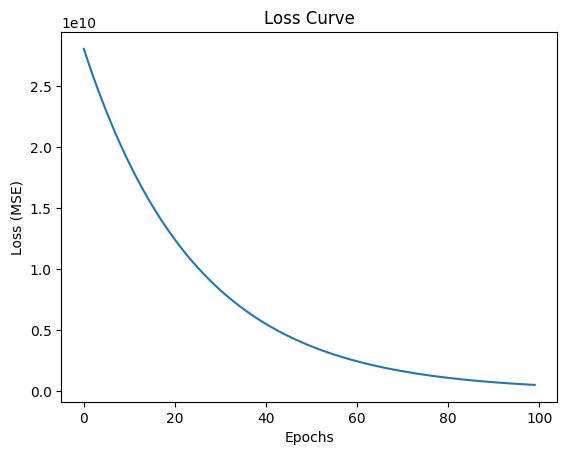

In [23]:
# Gradient Descent
def gradient_descent(X, y_true, learning_rate=0.01, epochs=1000):
    global W, b

    # Initialize a list to store the loss at each epoch
    loss_history = []

    # Training loop
    for epoch in range(epochs):
        # Forward pass
        y_pred = forward(X)

        # Compute loss (MSE for optimization)
        loss = mse(y_true, y_pred)
        loss_history.append(loss)

        # Compute gradients
        dW = -(2 / len(X)) * np.dot(X.T, (y_true - y_pred))
        db = -(2 / len(X)) * np.sum(y_true - y_pred)

        # Update weights and biases
        W -= learning_rate * dW
        b -= learning_rate * db

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

    return loss_history

# Prepare the data
X = data[['Experience_Years', 'Age']].values
y = data['Salary'].values.reshape(-1, 1)

# Normalize the input features (important for gradient descent)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Synthetic Design Matrix: \n",X_scaled[:5])

# Train the model using gradient descent
loss_history = gradient_descent(X_scaled, y, learning_rate=0.01, epochs=100)

# Plot the loss curve
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Loss Curve')
plt.show()

In [24]:
# Load a real-world dataset (example)
# For demonstration, you can load a CSV (replace with your own dataset)
data = pd.read_csv("Employee_Salary_Dataset.csv")

# Preprocess and scale data
X_real = data[['Experience_Years', 'Age']].values
y_real = data['Salary'].values.reshape(-1, 1)
X_real_scaled = scaler.transform(X_real)
print("Real Design Matrix: \n",X_real_scaled[:5])

# Make predictions using the trained model
y_real_pred = forward(X_real_scaled)

# Evaluate the model using MAE and MSE
print("MAE on Real Data:", mae(y_real, y_real_pred))
print("MSE on Real Data:", mse(y_real, y_real_pred))

Real Design Matrix: 
 [[-1.25329466 -1.04206309]
 [-1.72094192 -1.63175118]
 [-1.48711829 -1.46326887]
 [-1.6040301  -1.54751003]
 [-1.72094192 -1.9687158 ]]
MAE on Real Data: 1982043.5038132956
MSE on Real Data: 13349801597288.342


In [25]:
# Activity 1 Question: How does normalization affect the feature values?
# Answer: Normalization (e.g., StandardScaler) rescales feature values to have zero mean and unit variance.
# This prevents features with larger magnitudes from dominating the learning process and helps gradient descent converge faster.

# Activity 2 Question: Why does MSE penalize larger errors more than MAE?
# Answer: MSE (Mean Squared Error) squares the errors, so larger errors contribute disproportionately more to the total cost.
# MAE (Mean Absolute Error) takes the absolute difference, so the penalty is linear with the error's magnitude.
# Thus, MSE is more sensitive to outliers than MAE.

# Activity 3 Question: How does the learning rate affect convergence?
# Answer: The learning rate controls the step size in gradient descent.
# - Too small: Slow convergence, may get stuck in local minima or require many epochs.
# - Too large: May overshoot the minimum, causing oscillations or divergence of the loss.
# - Just right: Efficient convergence to the optimal solution.

# Activity 4 Question: Why might the model perform differently on real vs. synthetic data?
# Answer: Real data is often more complex, noisy, and may have different underlying distributions or feature relationships
# than simplified synthetic data. Models trained on synthetic data might not capture these real-world nuances,
# leading to poorer generalization and performance on real datasets. [cite: 1]

# Overall Question 1: How does the choice of cost function (MSE vs. MAE) affect optimization?
# Answer: - MSE: Differentiable, unique minimum (for linear regression), sensitive to outliers. Gradients are larger for larger errors.
#          - MAE: Robust to outliers, gradient is constant (can be an issue with varying error magnitudes), not differentiable at zero.
#          The choice influences how the optimizer prioritizes minimizing certain types of errors.

# Overall Question 2: What challenges arise when scaling to multiple features?
# Answer: - Curse of dimensionality: Data becomes sparse, requiring more data for robust learning.
#          - Increased computational cost: More parameters and calculations.
#          - Multicollinearity: Correlated features can make model coefficients unstable and hard to interpret.
#          - Higher risk of overfitting: Model might learn noise from irrelevant features.
#          - Feature scaling becomes more critical to ensure all features contribute appropriately.

# Overall Question 3: How does gradient descent compare to scikit-learn's built-in linear regression?
# Answer: - Gradient Descent (manual): Iterative, requires tuning (learning rate, epochs), good for understanding mechanics, flexible for other models.
#          - Scikit-learn (`LinearRegression`): Often uses an analytical solution (Normal Equation/OLS) which is direct and non-iterative.
#            It's highly optimized, robust, and simpler to implement for standard linear regression.
#            Scikit-learn can be faster for datasets where OLS is feasible.